In [144]:
#2024 05 21 오전 실습

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans #군집화
from sklearn.datasets import load_iris

iris = load_iris()
# 특성 (feature) 데이터
features = iris.data

# 목표 (target) 데이터
targets = iris.target

# 특성 데이터와 목표 데이터를 합쳐서 2차원 배열로 변환
# iris_2d = np.column_stack((features, targets))
iris_2d = iris.data

# 결과 출력
print(iris_2d)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [145]:
pca = PCA(n_components=2)
pca.fit(iris_2d)

PCA(n_components=2)

In [146]:
print(pca.components_.shape)

(2, 4)


In [147]:
print(np.sum(pca.explained_variance_ratio_))

0.977685206318795


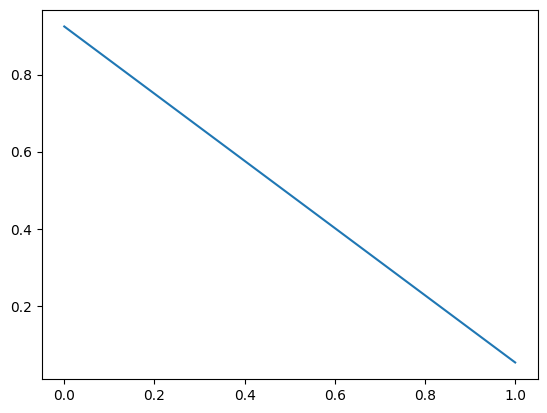

In [148]:
plt.plot(pca.explained_variance_ratio_)

In [149]:
iris_pca = pca.transform(iris_2d)
print(iris_pca.shape)

(150, 2)


In [155]:
km = KMeans(n_clusters=2, random_state=42)
km.fit(iris_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

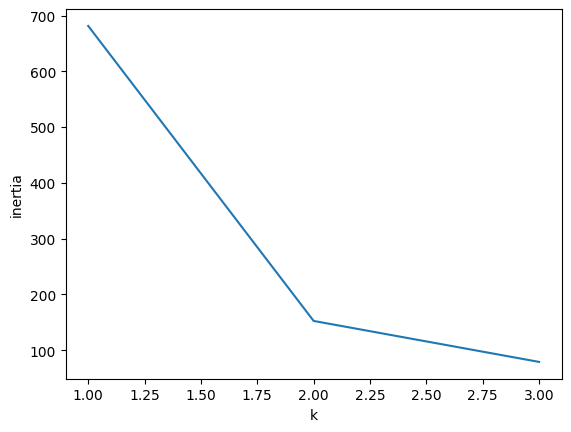

In [151]:
# 최적의 k 찾기

inertia = []
for k in range(1, 4):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(iris_2d)
    inertia.append(km.inertia_)

plt.plot(range(1, 4), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

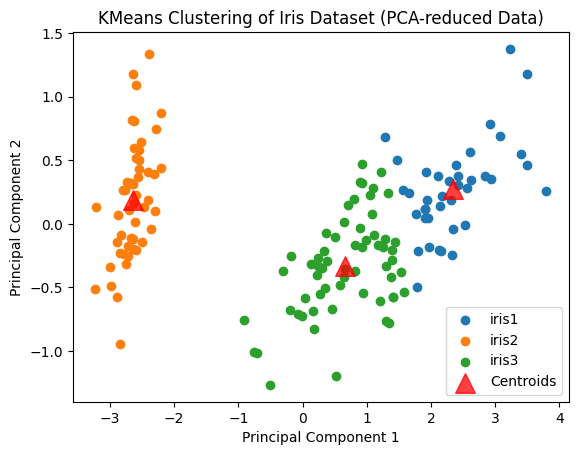

In [165]:
for label in range(0, 3):  # 2개의 클러스터
    data = iris_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1], label=f'Cluster {label+1}')

# 클러스터 중심 표시
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='^', label='Centroids')

# 그래프 꾸미기
plt.title('KMeans Clustering of Iris Dataset (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(['iris1', 'iris2', 'iris3', 'Centroids'])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


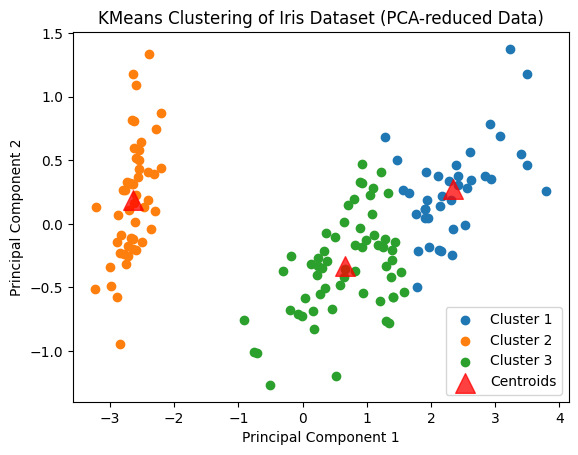

In [168]:
# import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Iris 데이터셋 로드
iris = load_iris()
features = iris.data

# PCA로 2차원으로 축소
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(features)

# KMeans 클러스터링
km = KMeans(n_clusters=3, random_state=42)
clusters = km.fit_predict(iris_pca)

# 시각화
# plt.figure(figsize=(8, 6))

# 각 클러스터 별 데이터 시각화
for label in range(0, 3):  # 3개의 클러스터
    data = iris_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1], label=f'Cluster {label+1}')

# 클러스터 중심 표시
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='^', label='Centroids')

# 그래프 꾸미기
plt.title('KMeans Clustering of Iris Dataset (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
